# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [2]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True
meas

In [3]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2023-01-06 19:03:54,224 | INFO : Running online!
2023-01-06 19:03:54,266 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2023-01-06 19:03:55,369 | INFO : 2023-01-06_19-03-55-369866
2023-01-06 19:03:55,533 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2023-01-06 19:03:55,996 | INFO : 2023-01-06_19-03-55-996660
2023-01-06 19:03:56,145 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2023-01-06 19:03:56,626 | INFO : 2023-01-06_19-03-56-626941
2023-01-06 19:03:56,769 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2023-01-06 19:03:57,260 | INFO : 2023-01-06_19-03-57-260490
2023-01-06 19:03:57,409 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.7412841617593623
2023-01-06 19:03:57,890 | INFO : 2023-01-06_19-03-57-890585
2023-01-06 19:03:58,118 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.20107013479946856
2023-01-06 19:03:58,572 | INFO : 2023-01-06_19-03-58-572209
2023-01-06 19:03:58,724 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0.3391438921604252
2023-01-06 19:03:59,239 | INFO : 2023-01-06_19-03-59-239810
2023-01-06 1

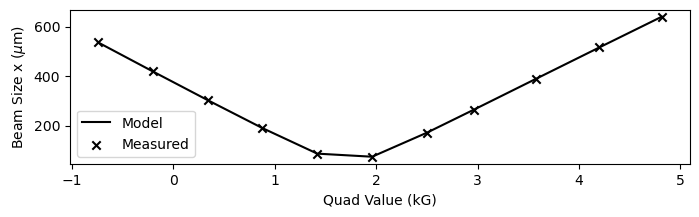

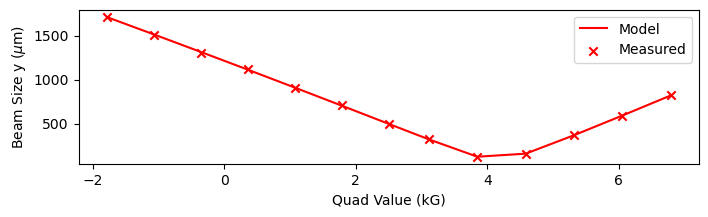

In [4]:
result = meas.measure_emittance()

# Examine results

In [5]:
import matplotlib.pyplot as plt

In [6]:
result

{'quadvalsx': array([-0.74128416, -0.20107013,  0.33914389,  0.87935792,  1.41957195,
         1.95978597,  2.5       ,  2.96304059,  3.58042805,  4.19781551,
         4.81520297]),
 'beamsizesx': array([5.35703751e-04, 4.18710870e-04, 3.03172652e-04, 1.89761990e-04,
        8.68683566e-05, 7.44284528e-05, 1.71041549e-04, 2.64923675e-04,
        3.90114584e-04, 5.16217748e-04, 6.38177801e-04]),
 'beamsizeserrx': array([0.02802931, 0.02361757, 0.01301094, 0.00673427, 0.00185041,
        0.00109852, 0.00474165, 0.00852257, 0.02004498, 0.02757959,
        0.04352587]),
 'error_x': False,
 'emit_x': 6.404356906267353e-09,
 'norm_emit_x': 1.0026206521309518e-06,
 'beta_x': 10.006102983312518,
 'alpha_x': -1.9988150235539113,
 'emit_x_err': 1.6222614818006318e-07,
 'norm_emit_x_err': 2.5396974100836816e-05,
 'beta_x_rel_err': 25.330591432421144,
 'alpha_x_rel_err': -1.7574159353541737e-15,
 'sigma_11': 6.40826547459999e-08,
 'sigma_12': 1.2801124800448434e-08,
 'sigma_22': 3.197192506327922e

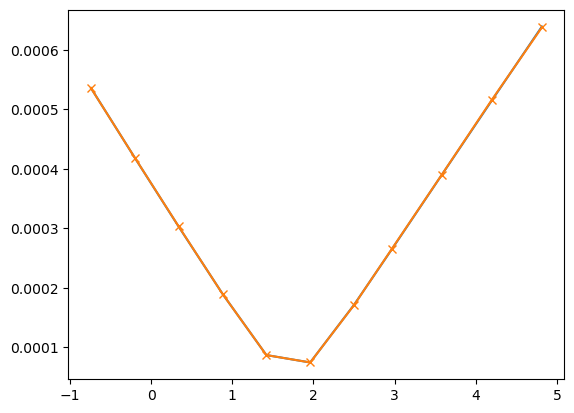

In [7]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

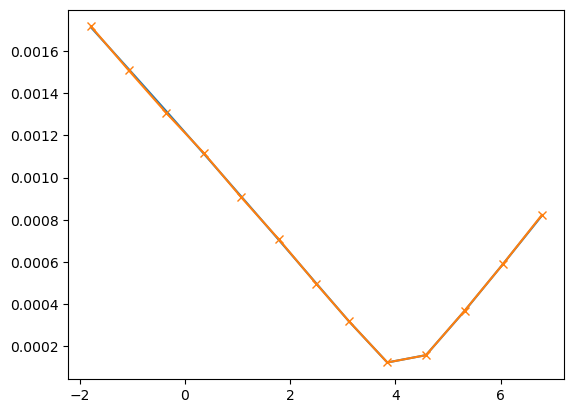

In [8]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Interactively change the quad and acquire the screen image

0.00037486171231124573


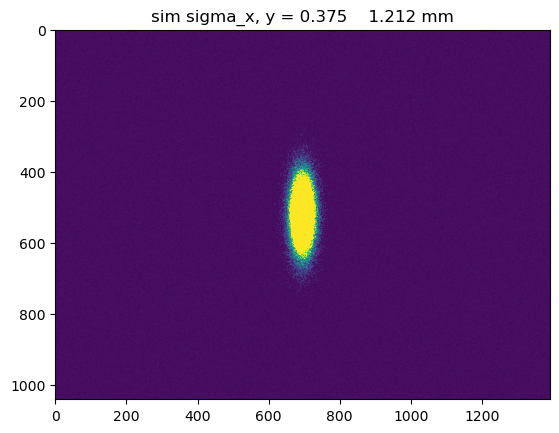

In [9]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)